In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"E:\csv files\cardio.csv")

In [4]:
df

,id,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alcohol_intake,Active,Cardiovascular
0,0,50.39,1,168,62.0,110,80,1,1,0,0,1,0
1,1,55.42,0,156,85.0,140,90,2,1,0,0,1,1
2,2,51.66,0,165,64.0,130,70,2,1,0,0,0,1
3,3,48.28,1,169,82.0,150,100,1,1,0,0,1,1
4,4,47.87,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2819,59.99,1,167,75.0,130,80,1,1,0,0,1,0
1996,2820,49.86,0,157,72.0,110,70,1,1,0,0,1,0
1997,2823,49.50,0,156,52.0,150,80,1,1,1,0,0,1
1998,2825,48.57,1,168,69.0,120,80,2,1,0,0,0,1


In [5]:
df.isnull().sum()

id                0
Age               0
Gender            0
Height            0
Weight            0
SBP               0
DBP               0
Cholesterol       0
Glucose           0
Smoking           0
Alcohol_intake    0
Active            0
Cardiovascular    0
dtype: int64

In [6]:
df.duplicated(keep='first').sum()

0

In [7]:
df['Height'].nunique()

52

<AxesSubplot:xlabel='Age'>

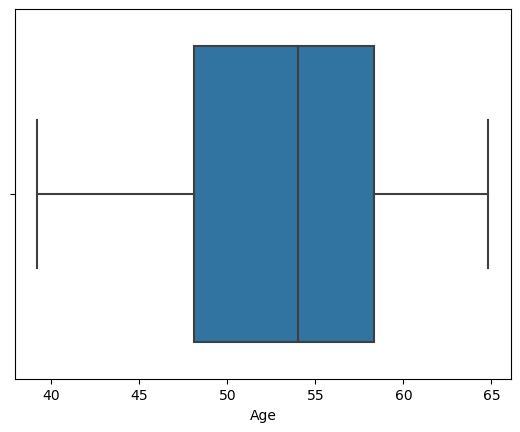

In [8]:
sns.boxplot(data=df,x='Age')

<AxesSubplot:xlabel='Weight'>

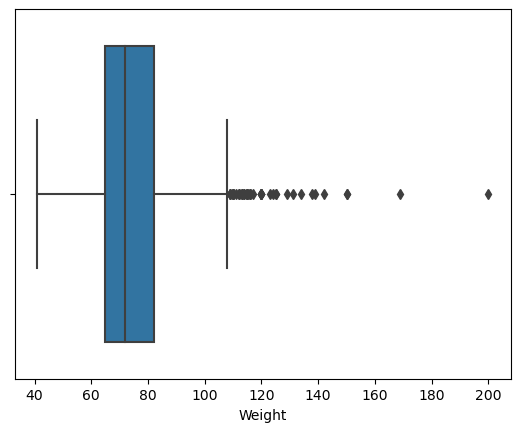

In [30]:
sns.boxplot(data=df,x='Weight')

Here we have found that the outlier are present in the weight columns so if there is necessary to remove we can remove the outliers the weight we found in outlier are very rare so i had deleted the outliers

In [18]:
q1=df['Weight'].quantile(0.25)

q3=df['Weight'].quantile(0.75)

iqr=q3-q1

lower_bound=q1-iqr*1.5

upper_bound=q3+iqr*1.5


df=df[df['Weight']<upper_bound]

<AxesSubplot:xlabel='Weight'>

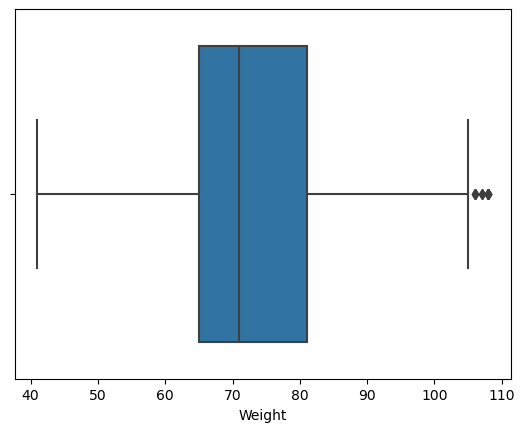

In [19]:
sns.boxplot(data=df,x='Weight')

In [20]:
df.shape

(1950, 13)

<AxesSubplot:xlabel='Age', ylabel='Count'>

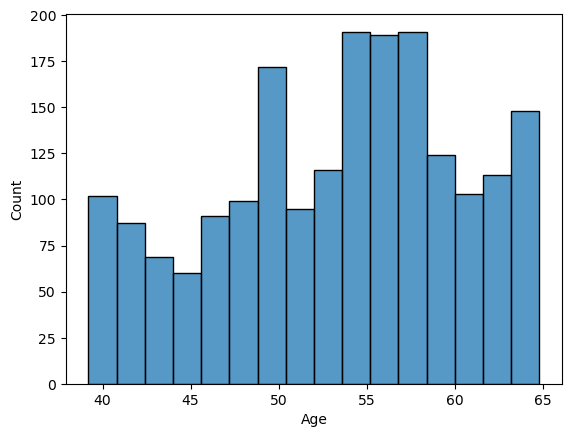

In [34]:
sns.histplot(data=df,x='Age')

By the Histplot i differentiated the count of ages there i declared that the age group between 53-58 are facing cardio vascular deseases are high

In [21]:
df.shape

(1950, 13)

In [23]:
df

,id,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alcohol_intake,Active,Cardiovascular
0,0,50.39,1,168,62.0,110,80,1,1,0,0,1,0
1,1,55.42,0,156,85.0,140,90,2,1,0,0,1,1
2,2,51.66,0,165,64.0,130,70,2,1,0,0,0,1
3,3,48.28,1,169,82.0,150,100,1,1,0,0,1,1
4,4,47.87,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2819,59.99,1,167,75.0,130,80,1,1,0,0,1,0
1996,2820,49.86,0,157,72.0,110,70,1,1,0,0,1,0
1997,2823,49.50,0,156,52.0,150,80,1,1,1,0,0,1
1998,2825,48.57,1,168,69.0,120,80,2,1,0,0,0,1


([<matplotlib.patches.Wedge at 0x12d4a53ee80>,
 [Text(-0.033666107097236185, 1.0994846944059373, '(0,)'),
  Text(0.03366600415604958, -1.099484697557981, '(1,)')],
 [Text(-0.018363331143947007, 0.5997189242214204, '51%'),
  Text(0.01836327499420886, -0.5997189259407169, '49%')])

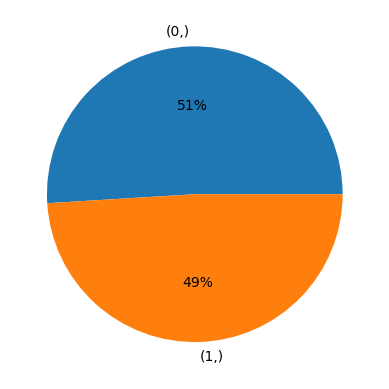

In [39]:
plt.pie(df[['Cardiovascular']].value_counts(),labels=df[['Cardiovascular']].value_counts().index,autopct='%0.0f%%')

the pie plot here is used to count the "cardiovascular" problem that human deals with 

In [26]:
# !pip install -U scikit-learn

#                             Machine Learning Part

# inputs and outputs

In [28]:
X=df[['Age','Gender','Height','Weight','SBP','DBP','Cholesterol','Glucose','Smoking','Alcohol_intake','Active']]

y=df['Cardiovascular']

The first step is used to differentiate the inputs and output for the future prediction based on which type of classification should perform

# train and test splitting

In [29]:
X.head()

,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alcohol_intake,Active
0,50.39,1,168,62.0,110,80,1,1,0,0,1
1,55.42,0,156,85.0,140,90,2,1,0,0,1
2,51.66,0,165,64.0,130,70,2,1,0,0,0
3,48.28,1,169,82.0,150,100,1,1,0,0,1
4,47.87,0,156,56.0,100,60,1,1,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In this step we should split the data into two types i.e 

1.Train

2.Test

Train part should conists of more data beacause if the algorithm had good amount of data the prediction of model will be good

when compared to Train data test data is lesser because here we will test the data according to the data trained

In [31]:
print(X_train.shape)

print(X_test.shape)


(1462, 11)
(488, 11)


This is the result after splitting the data into Train and Test

In [32]:
X_train_num=X_train[['Age','Gender','Height','Weight','SBP','DBP','Cholesterol','Glucose','Smoking','Alcohol_intake']]
X_train_num.head()

,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alcohol_intake
869,41.70,1,172,58.0,140,90,1,1,0,0
321,39.51,0,165,62.0,140,80,1,1,0,0
1711,59.82,0,151,56.0,120,80,1,1,0,0
948,46.12,1,178,86.0,120,80,2,2,0,0
1331,54.61,0,163,66.0,120,80,2,2,0,0


In [35]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_num_trans=pd.DataFrame(scaler.fit_transform(X_train_num),
                         columns=X_train_num.columns,
                           index=X_train_num.index)

X_train_num_trans.head()

,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alcohol_intake
869,-1.684313,1.354006,0.966633,-1.203265,0.751289,-0.035712,-0.583142,-0.432074,-0.321553,-0.224248
321,-2.003064,-0.738549,0.093815,-0.883893,0.751289,-0.126625,-0.583142,-0.432074,-0.321553,-0.224248
1711,0.953022,-0.738549,-1.651822,-1.362951,-0.365296,-0.126625,-0.583142,-0.432074,-0.321553,-0.224248
948,-1.040990,1.354006,1.714763,1.032340,-0.365296,-0.126625,1.714847,2.314416,-0.321553,-0.224248
1331,0.194715,-0.738549,-0.155562,-0.564521,-0.365296,-0.126625,1.714847,2.314416,-0.321553,-0.224248


Here the inputs are numerical so I performed Standardization Technique to rescale all the columns into Statistical measures

In [36]:
X_test_num=X_test[['Age','Gender','Height','Weight','SBP','DBP','Cholesterol','Glucose','Smoking','Alcohol_intake']]

X_test_num.head()

,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alcohol_intake
774,58.29,1,171,86.0,160,110,1,2,0,0
1545,57.66,0,156,65.0,120,80,1,1,0,0
1245,56.16,0,156,63.0,130,80,2,2,0,0
1078,64.15,0,160,81.0,150,90,2,2,0,0
1167,62.28,1,167,78.0,90,70,2,1,1,0


In [37]:
X_test_num_trans=pd.DataFrame(scaler.transform(X_test_num),
                             columns=X_test_num.columns,
                              index=X_test_num.index)

X_test_num_trans.head()

,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alcohol_intake
774,0.730333,1.354006,0.841945,1.032340,1.867875,0.146113,-0.583142,2.314416,-0.321553,-0.224248
1545,0.638637,-0.738549,-1.028380,-0.644364,-0.365296,-0.126625,-0.583142,-0.432074,-0.321553,-0.224248
1245,0.420315,-0.738549,-1.028380,-0.804050,0.192997,-0.126625,1.714847,2.314416,-0.321553,-0.224248
1078,1.583246,-0.738549,-0.529627,0.633125,1.309582,-0.035712,1.714847,2.314416,-0.321553,-0.224248
1167,1.311070,1.354006,0.343191,0.393596,-2.040174,-0.217538,1.714847,-0.432074,3.109909,-0.224248


In [38]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

classifier.fit(X_train_num_trans,y_train)

LogisticRegression()

LogisticRegression is a classification task algorithm used for classification tasks

In [41]:
y_test_predict=classifier.predict(X_test_num_trans)

In [42]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_test_predict)

0.7274590163934426

Merics is a evaluation step used for classification tasks

In [43]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier()

classifier.fit(X_train_num_trans,y_train)

KNeighborsClassifier()

The k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method here I used for classification task

In [179]:
y_test_predict=classifier.predict(X_test_num_trans)

In [182]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_test_predict)

0.6864754098360656

In [58]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(max_depth=3)

classifier.fit(X_train_num_trans,y_train)

DecisionTreeClassifier(max_depth=3)

Here i used Decision Tree classifier which is the most powerful and popular tool for classification and prediction

max_depth is used to control the overfitting and under fitting according to the data

In [62]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Cardiovascular, dtype: int64

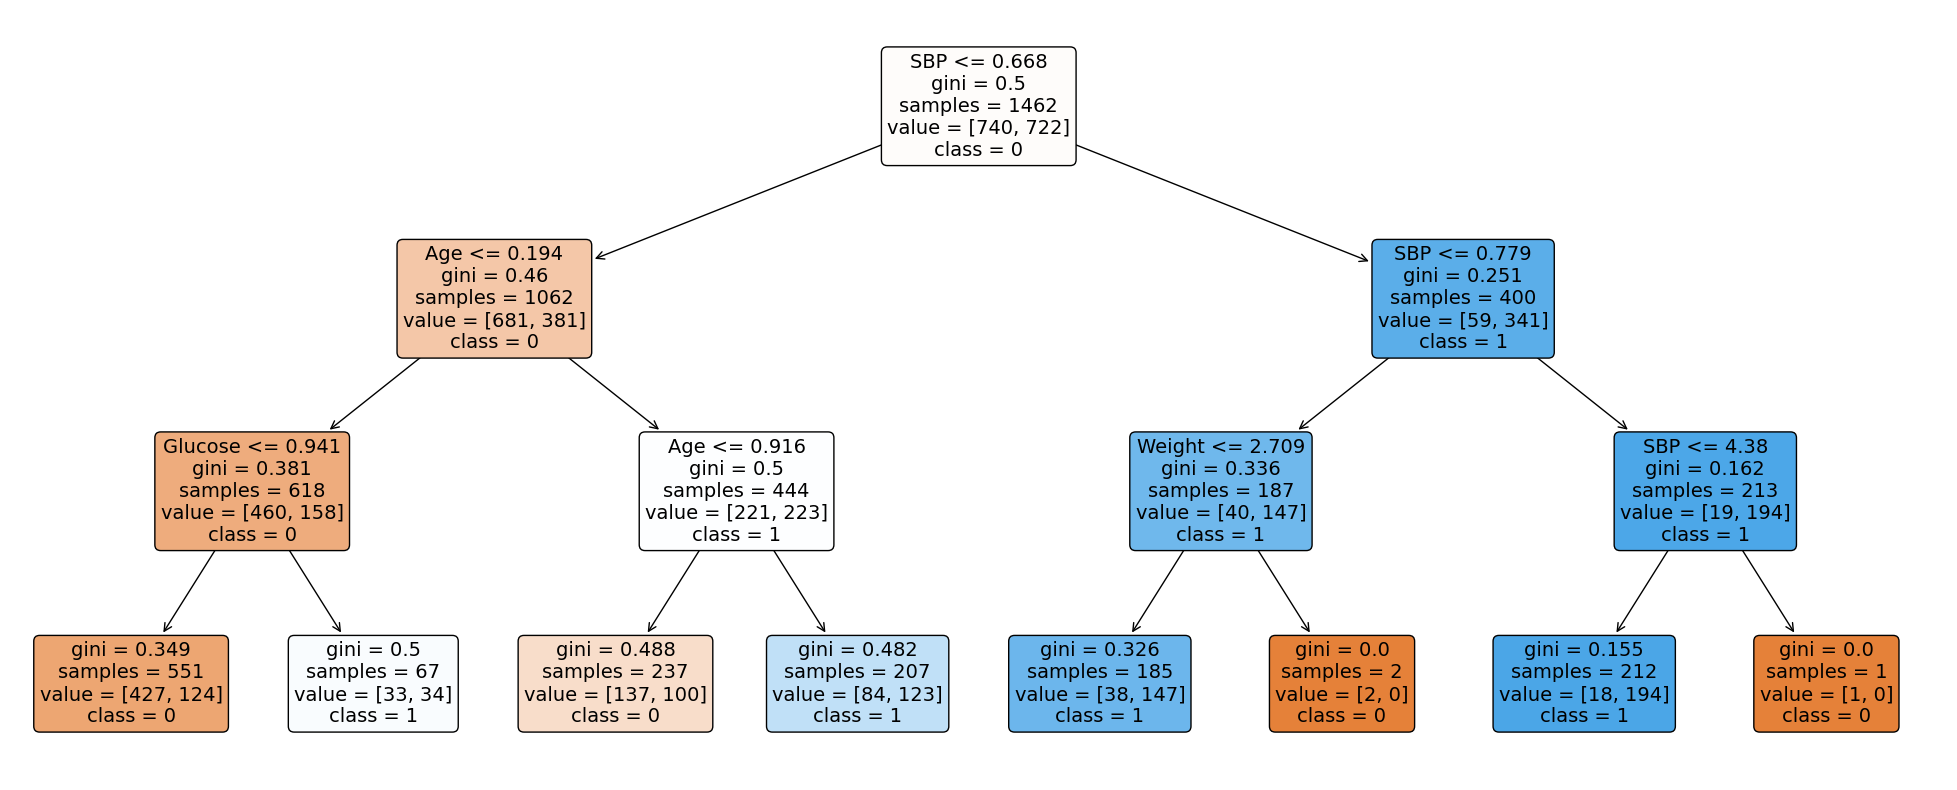

In [61]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

f = plot_tree(classifier, feature_names = X_train_num.columns, 
              class_names = ['0','1'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

In [45]:
y_test_predict=classifier.predict(X_test_num_trans)

In [46]:
metrics.accuracy_score(y_test,y_test_predict)

0.6475409836065574

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()

classifier.fit(X_train_num_trans,y_train)



RandomForestClassifier()

Here i used Random forests or random decision forests is an ensemble learning method for classification

In [49]:
y_test_predict=classifier.predict(X_test_num_trans)

metrics.accuracy_score(y_test,y_test_predict)

0.7192622950819673

# conclusion

## From the above Models I will consider the Logistic Regression Classifier is the best Model to suggest because we have predicted  good percentage compared with other models